<a href="https://colab.research.google.com/github/c3Zor/self-driving-car/blob/master/self_driving_car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#cloning git repository
!git clone https://github.com/c3Zor/self-driving-car.git

Cloning into 'self-driving-car'...
remote: Enumerating objects: 14056, done.
remote: Counting objects: 100% (14056/14056), done.
remote: Compressing objects: 100% (14056/14056), done.
remote: Total 14056 (delta 0), reused 14056 (delta 0), pack-reused 0
Receiving objects: 100% (14056/14056), 203.20 MiB | 29.79 MiB/s, done.
Checking out files: 100% (14063/14063), done.


In [4]:
# checking if everything is in tackt
!ls self-driving-car

driving_log.csv  IMG  jupyter_lab


In [0]:
#importing libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential 
from keras.optimizers import Adam
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
import cv2
import pandas as pd
import ntpath
import random

In [14]:
# dir assining directory to a variable dir
# defining collums of our csv data 
# loading our data to a pandas dataframe to a data var and assinging with named collums
# and saplming the random data
dir = 'self-driving-car'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(dir, 'driving_log.csv'),names=columns)
pd.set_option('display.max_colwidth', -1)
data.sample(5)  

,center,left,right,steering,throttle,reverse,speed
138,D:\torrent\data\simulator-windows-64\IMG\center_2018_12_28_07_14_38_018.jpg,D:\torrent\data\simulator-windows-64\IMG\left_2018_12_28_07_14_38_018.jpg,D:\torrent\data\simulator-windows-64\IMG\right_2018_12_28_07_14_38_018.jpg,-0.226130,1.0,0.0,30.17994
1803,D:\torrent\data\simulator-windows-64\IMG\center_2018_12_28_07_17_38_438.jpg,D:\torrent\data\simulator-windows-64\IMG\left_2018_12_28_07_17_38_438.jpg,D:\torrent\data\simulator-windows-64\IMG\right_2018_12_28_07_17_38_438.jpg,0.000000,1.0,0.0,30.18998
3187,D:\torrent\data\simulator-windows-64\IMG\center_2018_12_28_07_20_08_487.jpg,D:\torrent\data\simulator-windows-64\IMG\left_2018_12_28_07_20_08_487.jpg,D:\torrent\data\simulator-windows-64\IMG\right_2018_12_28_07_20_08_487.jpg,0.000000,1.0,0.0,30.19045
1155,D:\torrent\data\simulator-windows-64\IMG\center_2018_12_28_07_16_28_258.jpg,D:\torrent\data\simulator-windows-64\IMG\left_2018_12_28_07_16_28_258.jpg,D:\torrent\data\simulator-windows-64\IMG\right_2018_12_28_07_16_28_258.jpg,0.000000,1.0,0.0,30.18998
2803,D:\torrent\data\simulator-windows-64\IMG\center_2018_12_28_07_19_26_900.jpg,D:\torrent\data\simulator-windows-64\IMG\left_2018_12_28_07_19_26_900.jpg,D:\torrent\data\simulator-windows-64\IMG\right_2018_12_28_07_19_26_900.jpg,0.343596,1.0,0.0,30.19054


In [17]:
# creating a function to split path and leave only img name 
# we have to apply this function to our data
# becouse this is dataframe series type we can invope path_leaf function by using apply function

def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.sample(5)

,center,left,right,steering,throttle,reverse,speed
2487,center_2018_12_28_07_18_52_558.jpg,left_2018_12_28_07_18_52_558.jpg,right_2018_12_28_07_18_52_558.jpg,0.000000,1.0,0.0,30.19015
476,center_2018_12_28_07_15_14_799.jpg,left_2018_12_28_07_15_14_799.jpg,right_2018_12_28_07_15_14_799.jpg,0.000000,1.0,0.0,30.19036
3825,center_2018_12_28_07_21_17_859.jpg,left_2018_12_28_07_21_17_859.jpg,right_2018_12_28_07_21_17_859.jpg,0.512602,1.0,0.0,30.18595
2172,center_2018_12_28_07_18_18_441.jpg,left_2018_12_28_07_18_18_441.jpg,right_2018_12_28_07_18_18_441.jpg,1.000000,0.0,1.0,18.00608
870,center_2018_12_28_07_15_57_342.jpg,left_2018_12_28_07_15_57_342.jpg,right_2018_12_28_07_15_57_342.jpg,0.000000,1.0,0.0,30.19025


In [21]:
# lest create a number of bins and put steering data in it to check the values 
# becouse it is note centered on 
num_bins = 25
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1]+bins[1:]) * 0.5
print(center)

[-0.96 -0.88 -0.8  -0.72 -0.64 -0.56 -0.48 -0.4  -0.32 -0.24 -0.16 -0.08
  0.    0.08  0.16  0.24  0.32  0.4   0.48  0.56  0.64  0.72  0.8   0.88
  0.96]


<Container object of 25 artists>

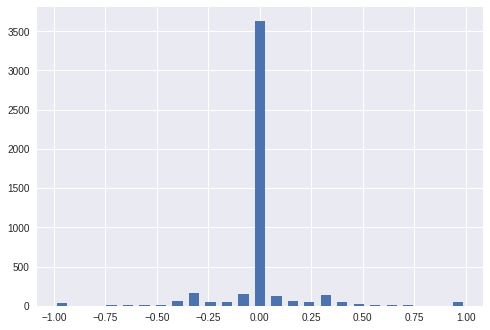

In [23]:
# ploting the distribution of steering angles
plt.bar(center,hist, width=0.05)

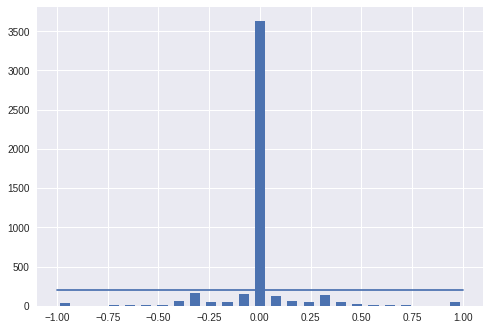

In [27]:
# we have to lower number of samples per bin becouse we want to have more
# equal distribution between sterring angles
samples_per_bin = 200
plt.bar(center,hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])),(samples_per_bin, samples_per_bin))